In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [6]:
df = pd.read_csv("/Users/emrecanciftci/betik/2024_bio/data/08_Ch8/Supplementary files/diabetes.txt", delimiter="\t",)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,442.0,48.518100,13.109028,19.0000,38.2500,50.00000,59.0000,79.000
SEX,442.0,1.468326,0.499561,1.0000,1.0000,1.00000,2.0000,2.000
BMI,442.0,26.375792,4.418122,18.0000,23.2000,25.70000,29.2750,42.200
BP,442.0,94.647014,13.831283,62.0000,84.0000,93.00000,105.0000,133.000
S1,442.0,189.140271,34.608052,97.0000,164.2500,186.00000,209.7500,301.000
S2,442.0,115.439140,30.413081,41.6000,96.0500,113.00000,134.5000,242.400
S3,442.0,49.788462,12.934202,22.0000,40.2500,48.00000,57.7500,99.000
S4,442.0,4.070249,1.290450,2.0000,3.0000,4.00000,5.0000,9.090
S5,442.0,4.641411,0.522391,3.2581,4.2767,4.62005,4.9972,6.107
S6,442.0,91.260181,11.496335,58.0000,83.2500,91.00000,98.0000,124.000


In [18]:
# Splitting data fro train/test
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110)

In [21]:
# Reggression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

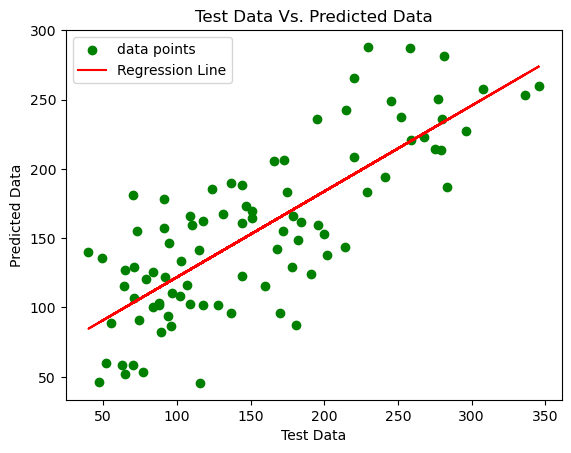

In [76]:
prediction = regressor.predict(X_test)
plt.scatter(y_test, prediction, color="g", label="data points")

# Regression line
m, b = np.polyfit(y_test, prediction, 1)  # Calculate slope (m) and intercept (b)
plt.plot(y_test, m*y_test + b, color='red', label='Regression Line')

plt.xlabel('Test Data')
plt.ylabel('Predicted Data')
plt.title('Test Data Vs. Predicted Data')
plt.legend()
plt.show()

In [56]:
print('Mean Absolute Error:',
metrics.mean_absolute_error(y_test,prediction))
print('Mean Squared Error:',
metrics.mean_squared_error(y_test, prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
#To retrieve the intercept:
print("intercept", regressor.intercept_)
#For retrieving the slope:
print("slope", regressor.coef_)

Mean Absolute Error: 39.22466065716577
Mean Squared Error: 2228.0908310594655
Root Mean Squared Error: 47.202657033894454
intercept -307.571045465055
slope [ 1.40608997e-01 -2.56128390e+01  5.08771783e+00  1.19293496e+00
 -1.08819176e+00  8.03227722e-01  4.24108443e-02  4.53744471e+00
  6.51304992e+01  3.71060693e-01]


In [60]:
coeff_df = pd.DataFrame(regressor.coef_.T, X.columns, columns=["Coefficient"])
coeff_df

,Coefficient
AGE,0.140609
SEX,-25.612839
BMI,5.087718
BP,1.192935
S1,-1.088192
S2,0.803228
S3,0.042411
S4,4.537445
S5,65.130499
S6,0.371061


294   NaN
159   NaN
312   NaN
119   NaN
134   NaN
       ..
414   NaN
166   NaN
434   NaN
390   NaN
168   NaN
Length: 89, dtype: float64

In [47]:
df = pd.read_csv("/Users/emrecanciftci/betik/2024_bio/data/08_Ch8/Supplementary files/Galton.txt", delimiter="\t")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Family  898 non-null    object 
 1   Father  898 non-null    float64
 2   Mother  898 non-null    float64
 3   Gender  898 non-null    object 
 4   Height  898 non-null    float64
 5   Kids    898 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 42.2+ KB


In [78]:
df.describe()

,Father,Mother,Height,Kids
count,898.000000,898.000000,898.000000,898.000000
mean,69.232851,64.084410,66.760690,6.135857
std,2.470256,2.307025,3.582918,2.685156
min,62.000000,58.000000,56.000000,1.000000
25%,68.000000,63.000000,64.000000,4.000000
50%,69.000000,64.000000,66.500000,6.000000
75%,71.000000,65.500000,69.700000,8.000000
max,78.500000,70.500000,79.000000,15.000000


In [54]:
X = df.iloc[:,1:4]
y = df.iloc[:,4]

# Gender mapping 
X.Gender = X.Gender.map({"M": 1, "F":2})

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=110)

In [72]:
h_regressor = LinearRegression()
h_regressor.fit(X_train, y_train)

0.6540503027760215

In [ ]:
h_prediction = h_regressor.predict(X_test)

180

Text(0, 0.5, 'Predicted data')

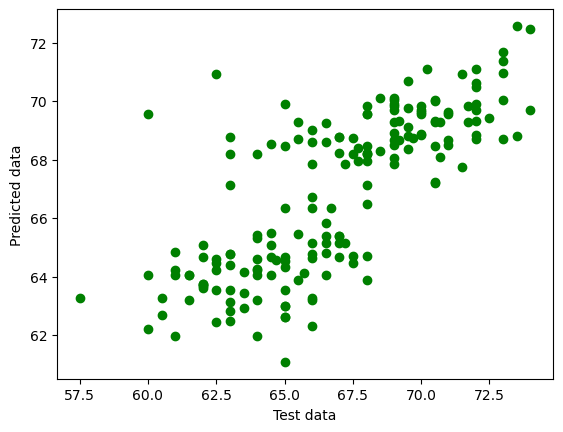

In [74]:
plt.scatter(y_test, h_prediction, color="g")
plt.xlabel("Test data")
plt.ylabel("Predicted data")

In [77]:
np.sqrt(metrics.mean_squared_error(y_test, h_prediction))

2.297161588733374